<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/KC_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/insurance.csv")

In [38]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

# Duplicate



In [39]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count


1

In [40]:
df = df.drop_duplicates()
df.duplicated().sum()


0

# Missing Values

In [41]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Encode Categorical variables

In [42]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical variables
label_encoders = {}
for col in ['sex', 'smoker']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-hot encode 'region' since it has more than two categories
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Display the transformed dataset's first few rows
df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


# Distribution

In [43]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for numerical columns
num_cols = ['age', 'bmi', 'charges']
for col in num_cols:
    df = remove_outliers(df, col)

# Display dataset shape after removing outliers
df.shape


(1190, 9)

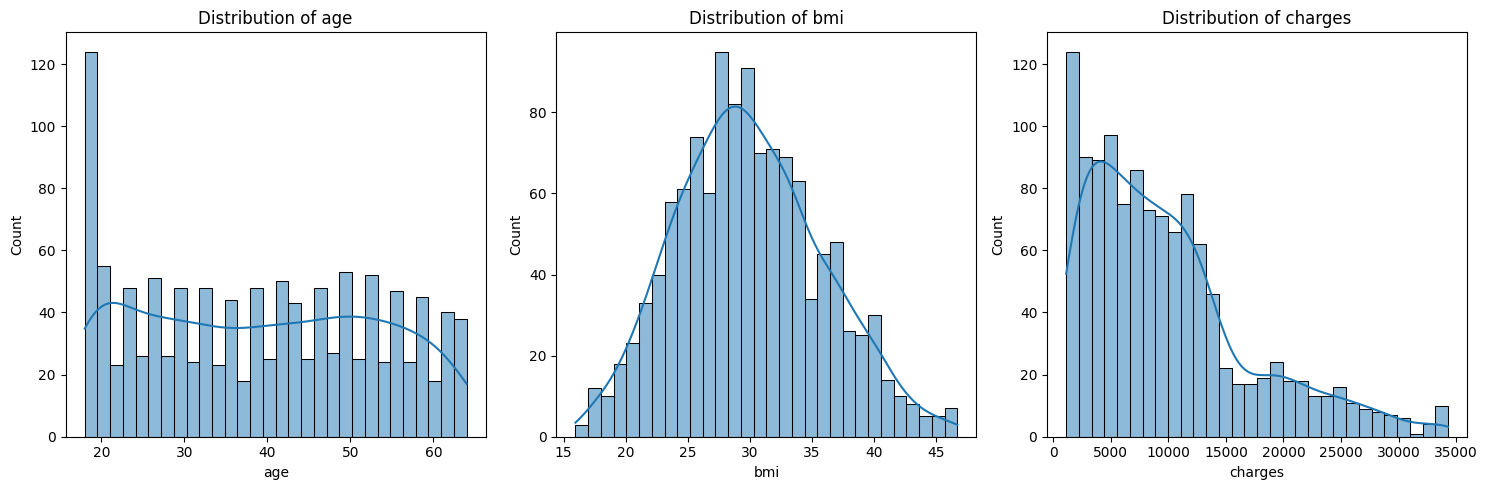

In [44]:
# Plot distributions of numerical variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
